In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from matplotlib.colors import LinearSegmentedColormap
colors = []
for j in np.linspace(1, 0, 100):
    colors.append((30./255, 136./255, 229./255,j))
for j in np.linspace(0, 1, 100):
    colors.append((255./255, 13./255, 87./255,j))
red_transparent_blue = LinearSegmentedColormap.from_list("red_transparent_blue", colors)

In [3]:
result = np.load('./result_array_17.npy')

In [4]:
result.shape

(1, 10, 14, 14)

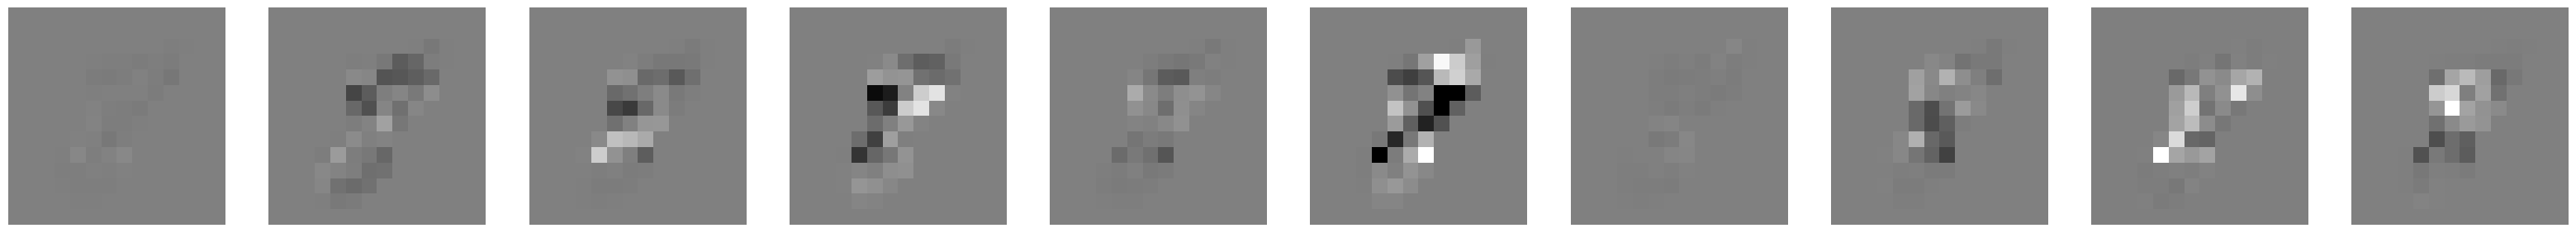

In [14]:
plt.figure(figsize=(40, 10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(result[0][i], cmap='grey', vmin=-np.nanpercentile(result[0], 99.9),vmax=np.nanpercentile(result[0], 99.9))
    plt.axis('off')

In [13]:
result[0][7]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -3.27398964e-03, -8.91445913e-01, -8.98731913e-03,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.46142776e-01,
         1.42012822e+00,  7.63478805e-01, -2.